In [5]:
#imports
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

## Load Data

In [9]:
#creates a dataframe from a file
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

df = pd.DataFrame(X_train)

#info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Columns: 2132 entries, 0 to 2131
dtypes: float64(2132)
memory usage: 119.3 MB
None


In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis (EDA)


In [11]:
#check for duplicates
print(df.duplicated().sum())

#typically this next step should be in data processing but without it the EDA would be less meaningful
#replacing the ? values with Nan values 
df.replace('?', np.nan, inplace=True)#({'?': np.nan})

#convert all object columns to float
columns_list = df.columns.tolist()

#X3 column starts the type object columns
feature_until_x3 = 11
apply_conv_to_obj = len(columns_list) - feature_until_x3 

for column_obj in range (apply_conv_to_obj):
    apply = feature_until_x3 + column_obj
    
    #print (f"columns_list[apply] {columns_list[apply]}")
    df[columns_list[apply]] = df[columns_list[apply]].astype(float)



print("\n",df.info())


321


In [12]:
#statistical info of the data
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131
count,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,...,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000
mean,430.518010,431.037078,5.430285,1.206897,6.527327,1.128799,4.678070,30.497615,59.165190,6.594930,...,0.396211,0.036800,0.031075,0.088456,0.027668,0.011040,0.018264,0.038026,0.094725,0.036800
std,181.613020,181.757699,4.160569,2.527815,5.983082,2.218665,2.789156,12.882724,25.749585,4.403703,...,0.489143,0.188283,0.173533,0.283976,0.164031,0.104497,0.133912,0.191273,0.292855,0.188283
min,135.068414,135.166000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,19.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,357.124405,357.429000,4.000000,0.000000,4.000000,0.000000,3.000000,25.000000,49.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,419.107040,419.500000,5.000000,1.000000,6.000000,1.000000,4.000000,30.000000,57.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,472.228141,472.888000,6.000000,1.000000,8.000000,1.000000,6.000000,33.000000,65.000000,8.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3768.848446,3771.262000,92.000000,47.000000,137.000000,42.000000,58.000000,266.000000,527.000000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Histograms


In [13]:
df.hist(bins=50, figsize=(20,15))
plt.show()

KeyboardInterrupt: 

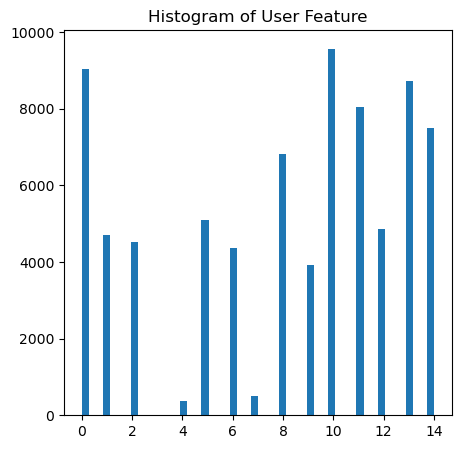

In [29]:
#histogram of user

hist, bin_edges = np.histogram(df['User'], bins=50)
plt.figure(figsize=(5,5))
plt.hist(df['User'], bins=50)
plt.title('Histogram of User Feature')
plt.show()

### Check for Outliers
Identify outliers and anomalies in the data.

df.columns.tolist() ['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11']
column_1 2 column_2 3 column_3 4
column_1 5 column_2 6 column_3 7
column_1 8 column_2 9 column_3 10
column_1 11 column_2 12 column_3 13
column_1 14 column_2 15 column_3 16
column_1 17 column_2 18 column_3 19
column_1 20 column_2 21 column_3 22
column_1 23 column_2 24 column_3 25
column_1 26 column_2 27 column_3 28
column_1 29 column_2 30 column_3 31
column_1 32 column_2 33 column_3 34
column_1 35 column_2 36 column_3 37


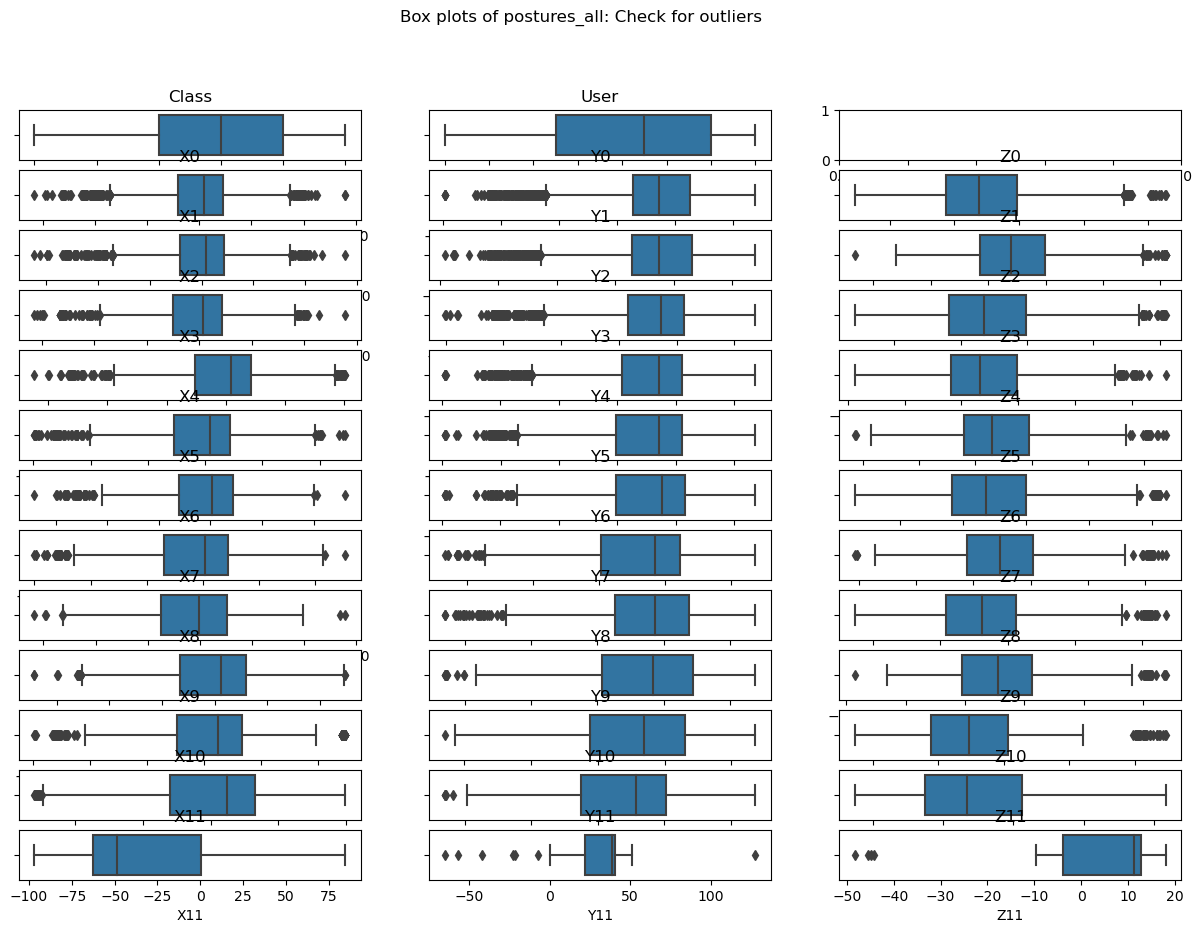

In [11]:
# Check for outliers

# Create a grid of subplots
# 3 columns and 13 rows to represent the 38 columns of the dataset, but 1 subplot stays empty
fig, axs = plt.subplots(ncols=3, nrows=13, figsize=(15, 10))

columns_list = df.columns.tolist()
print (f"df.columns.tolist() {columns_list }")

# Set titles
axs[0, 0].set_title(columns_list[0])
axs[0, 1].set_title(columns_list[1])

for line in range (12): # apply  to the 0-11
    line_plus_1 = line + 1
    
    axs[line_plus_1, 0].set_title(columns_list[2+line*3])
    axs[line_plus_1, 1].set_title(columns_list[3+line*3])
    axs[line_plus_1, 2].set_title(columns_list[4+line*3])

sns.boxplot(x=df[columns_list[0]], ax=axs[0, 0])
sns.boxplot(x=df[columns_list[1]], ax=axs[0, 1])


for line in range (12): # apply  to the 0-11
    line_plus_1 = line + 1
    
    column_1 = 2+line*3
    column_2 = 3+line*3
    column_3 = 4+line*3
    print (f"column_1 {column_1} column_2 {column_2} column_3 {column_3}")
    sns.boxplot(x=df[columns_list[column_1]], ax=axs[line_plus_1, 0])
    sns.boxplot(x=df[columns_list[column_2]], ax=axs[line_plus_1, 1])
    sns.boxplot(x=df[columns_list[column_3]], ax=axs[line_plus_1, 2])

    # Add a title to the entire figure
fig.suptitle('Box plots of postures_all: Check for outliers')
plt.show()

### Looking for correlations


Correlations Matrix

Class    1.000000
Y9       0.232697
Y10      0.172631
Y3       0.169636
Y2       0.169296
Y8       0.167774
Y4       0.167576
Y1       0.144135
Y11      0.125613
Y5       0.119431
Z2       0.095512
Z1       0.089894
Y0       0.081808
Z3       0.081754
X0       0.080209
Y7       0.062988
Y6       0.062274
X10      0.053492
Z0       0.051832
Z4       0.050872
Z11      0.015265
X1      -0.010528
Z5      -0.027608
User    -0.030667
Z10     -0.048124
X6      -0.051873
X2      -0.052351
X5      -0.052454
X4      -0.055786
X3      -0.056136
Z9      -0.075456
X9      -0.086346
X11     -0.105516
X7      -0.106753
X8      -0.119278
Z8      -0.119760
Z6      -0.157359
Z7      -0.248780
Name: Class, dtype: float64


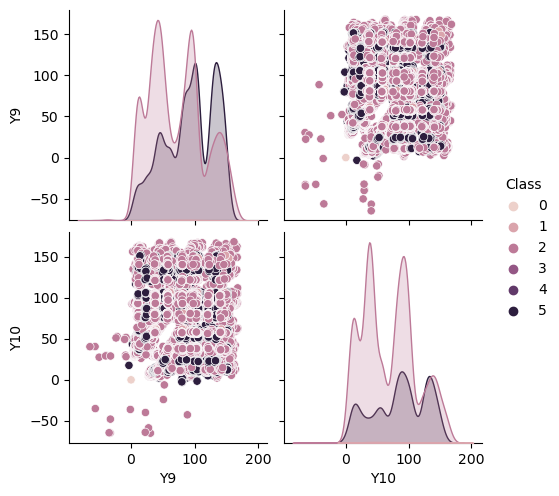

In [12]:
#creates a matrix of correlations
corr_matrix = df.corr() 
#how much each attribute correlates with the Class target variable value, the lower the value the least relevant the feature is
print("\nCorrelations Matrix\n")
print(corr_matrix['Class'].sort_values(ascending=False))#to present all columns their type cannot be object so we must convert it to float

#plot to present the correlation between the 2 most correlated features with target variable
sns.pairplot(df, vars=['Y9', 'Y10'], hue='Class')


## Data processing


In [13]:
#eliminating the first row of the dataset
df = df.iloc[1:]

print(df)



       Class  User         X0          Y0         Z0         X1          Y1  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
5          1     0  55.142401   71.435607 -64.177303  36.175818   81.556874   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

In [14]:
#eliminating the last 3 columns because they have more than 99,9% of Nan values
df = df.iloc[:, :-3]

print(df)

#create dummies to change the variable user from numeric to categorical, adding a column for each user
df = pd.concat([df,pd.get_dummies(df['User'], prefix= 'user')], axis = 1)
print(df)

#eliminating the original numerical User column
df = df.drop(columns=["User"])

print(df.info())



       Class  User         X0          Y0         Z0         X1          Y1  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
5          1     0  55.142401   71.435607 -64.177303  36.175818   81.556874   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

### Train Test Split


In [15]:
#defining the X and y for the train test split
X = df.iloc[:, 1:]#all columns starting from index 1 onward
y = df.iloc[:, 0]#first column of the dataset "Class" target variable column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

X_train.info()
print("\n")
y_train.info()
print("\n")
X_test.info()
print("\n")
y_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58571 entries, 59111 to 15726
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X0       58571 non-null  float64
 1   Y0       58571 non-null  float64
 2   Z0       58571 non-null  float64
 3   X1       58571 non-null  float64
 4   Y1       58571 non-null  float64
 5   Z1       58571 non-null  float64
 6   X2       58571 non-null  float64
 7   Y2       58571 non-null  float64
 8   Z2       58571 non-null  float64
 9   X3       58042 non-null  float64
 10  Y3       58042 non-null  float64
 11  Z3       58042 non-null  float64
 12  X4       56226 non-null  float64
 13  Y4       56226 non-null  float64
 14  Z4       56226 non-null  float64
 15  X5       48842 non-null  float64
 16  Y5       48842 non-null  float64
 17  Z5       48842 non-null  float64
 18  X6       39210 non-null  float64
 19  Y6       39210 non-null  float64
 20  Z6       39210 non-null  float64
 21  X7      

### Scaling, Imputation and Classification models

#### Auxiliar functions

In [19]:
# Execute list of scalers, imputers,models and present the results 
def test_models (scalers, imputers,models, X_train, y_train, X_test,y_test, verbose):
    results =[]
    ct = 0
    for name_scaler, scaler in scalers:
        for name_imputer, imputer in imputers:
            for name_mod, model in models:
                #scaling
                scaler.fit(X_train)
                Xt_train = scaler.transform(X_train)
                Xt_test  = scaler.transform(X_test)

                #imputing
                imputer.fit(Xt_train)
                Xt_train = imputer.transform(Xt_train)
                Xt_test  = imputer.transform(Xt_test)


                model.fit(Xt_train, y_train)
                preds = model.predict(Xt_test) #PREDICTION

                #present model number
                if verbose:
                    ct += 1
                    print("\nModel %d" % ct)

                #save results
                results = save_results (name_scaler, scaler, name_imputer, imputer, name_mod, model, results,y_test, preds, verbose)
    
    results_sorted = sorted(results, key=lambda x: x[8], reverse=True) #f1 sorted decreasing
    display_results(results_sorted)
    return results



# Save the model scores and present intermediate results (w/ verbose)
# Returns the list with the saved results 
def save_results(name_scaler, scaler,name_imputer, imputer, name_mod, model, results, y_test, preds, verbose):

    # Calculate the precision, recall, f1 and mcc scores
    #the target variable Class has 5 different values so we need to do a weighted average for the precision, recall and f1 scores
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    mcc = matthews_corrcoef(y_test, preds)
    
    if verbose:
        print(f"Scaler: {scaler} imputer: {imputer} classifier: {name_mod} {model}")
        print("The Precision is: %7.4f" % precision)
        print("The Recall is: %7.4f" % recall)
        print("The F1 score is: %7.4f" % f1)
        print("The Matthews correlation coefficient is: %7.4f" % mcc)
        print()
        print("This is the Confusion Matrix")
        print(pd.DataFrame(confusion_matrix(y_test, preds)))


    results.append((name_scaler,
                    scaler,
                    name_imputer, 
                    imputer, 
                    name_mod, 
                    model,
                    precision,
                    recall,
                    f1,
                    mcc,                    
                    ))
    return results

# Display the model final results. Receives the ordered results to present
def display_results (results):        
    
    noshow = ""
    print (f"\n--------------------------Results for Classification Models Performance--------------------------")
    for res in results:
        name_scaler = res [0]
        scaler = res [1]
        name_imputer = res [2]
        imputer = res [3]
        name_mod = res [4]
        model = res [5]
        precision = res [6]
        recall = res [7]
        f1 = res [8]
        mcc = res [9]

        print(f"{name_mod.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}| mcc     {mcc:.4f}")
        print(f"{noshow.ljust(25)} | scaler {scaler} | imputer {imputer}")  

    

In [21]:
# Defining a list of scalers
scalers = [
    ('PowerTransformer', PowerTransformer()),
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler())
]

# Defining a list of Imputers
imputers = [
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('KNNImputer', KNNImputer(n_neighbors=3))
]

# Defining a list of classification models
classification_models = [
    ('LogisticRegression', LogisticRegression(C = 0.01)),
    ('LogisticRegression', LogisticRegression(C = 1)),
    ('DecisionTree_maxd10', DecisionTreeClassifier(max_depth = 10)),
    ('DecisionTree_maxd20', DecisionTreeClassifier(max_depth = 20)),
    ('DecisionTree_minsl20', DecisionTreeClassifier(min_samples_leaf = 5)),
    ('DecisionTree_minsl10', DecisionTreeClassifier(min_samples_leaf = 10)),
    ('DecisionTree_critgini', DecisionTreeClassifier(criterion = 'gini')),
    ('DecisionTree_critentropy', DecisionTreeClassifier(criterion = 'entropy')),
    ('GaussianNB', GaussianNB()),
    ('KNN_K3_balltree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'ball_tree')),
    ('KNN_K3_kdtree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree')),
    ('KNN_K5_balltree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree')), 
    ('KNN_K5_kdtree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree')),
    ('KNN_K5_balltree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree',weights = 'distance')), 
    ('KNN_K5_kdtree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree',weights = 'distance'))
]


results_classification = []
VERBOSE = False # True to present/print the progress of the model performance

results_classification =  test_models (scalers, imputers, classification_models, X_train, y_train, X_test,y_test, VERBOSE)



c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



--------------------------Results for Classification Models Performance--------------------------
DecisionTree_critentropy  | precision     0.9678 | recall     0.9678 | f1     0.9678| mcc     0.9597
                          | scaler PowerTransformer() | imputer SimpleImputer(strategy='median')
DecisionTree_critentropy  | precision     0.9675 | recall     0.9675 | f1     0.9675| mcc     0.9593
                          | scaler MinMaxScaler() | imputer SimpleImputer(strategy='median')
DecisionTree_critgini     | precision     0.9673 | recall     0.9673 | f1     0.9673| mcc     0.9591
                          | scaler StandardScaler() | imputer SimpleImputer()
DecisionTree_critentropy  | precision     0.9668 | recall     0.9668 | f1     0.9668| mcc     0.9584
                          | scaler StandardScaler() | imputer SimpleImputer(strategy='median')
DecisionTree_maxd20       | precision     0.9666 | recall     0.9666 | f1     0.9666| mcc     0.9582
                          | scale